### 1st Virtual Methods Seminar: Methods of Computational Social Science
## Introduction to Social Network Science with Python
# Network Construction & Visualization (Exercise 2.1 - Solutions)
Instructors: Haiko Lietz & Olga Zagovora

Date: September 23, 2020

## Packages

In [1]:
import sys
libs_path = '../libs/'
sys.path.append(libs_path)
import compsoc as cs

In [2]:
import networkx as nx
import pandas as pd

## Introduction

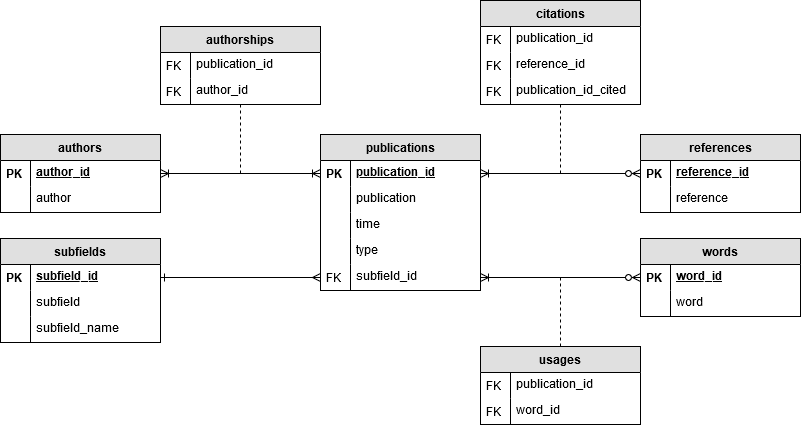

In this exercise, we will take a look at the scholarly field of Social Network Science (1916-2012). It will be our example dataset to learn to get traction on the functions `compsoc` provides to make network analysis easier for us. In particular, we will construct and draw a co-authorship network. Load the dataset using the `sns_collection()` function:

In [3]:
publications, subfields, authors, authorships, words, usages = cs.sns_collection(path='../../data/sns/')

Get familiar with this data collection. Above you see the entity relationship model. **Take a look** at the `publications`, `authors`, and `authorships` tables. See how identifiers are used in these tables and where attributes are stored:

In [4]:
publications.head()

,publication_id,publication,time,type,subfield_id
0,0,HANIFAN_1916_A_130,1916,ARTICLE,0
1,1,YULE_1925_P_21,1925,ARTICLE,1
2,2,KERMACK_1927_P_700,1927,ARTICLE,1
3,3,ECKART_1936_P_211,1936,ARTICLE,2
4,4,COASE_1937_E_386,1937,ARTICLE,1


In [5]:
cs.project_selection_matrix

<function compsoc.project_selection_matrix(selections, how, transaction_id='transaction_id', fact_id='fact_id', norm=True, remove_loops=True, symmetrize=True)>

The data needs preprocessing before it can be used.

(1) Extract all authorships since 2010. First extract all publications published since 2010, ...

In [6]:
publications_2010 = publications[publications['time'] >= 2010]['publication_id']

... then extract all authorships in which those publications were authored:

In [7]:
authorships_2010 = authorships[authorships['publication_id'].isin(publications_2010)].copy()

(2) Remove publications with exceptionally many authors. First identify the team size per publication, ...

In [8]:
team_size = authorships_2010.groupby('publication_id').size()

... then remove from this dataframe column those publications with (mean + 3 dtandard deviations) or more authors, ...

In [9]:
publication_ids = team_size[team_size < team_size.mean()+3*team_size.std()].index

... and only keep the respective `authorships`:

In [10]:
authorships_2010 = authorships_2010[authorships_2010['publication_id'].isin(publication_ids)]

(3) Assign a unit weight to be used as cell values for matrix construction. These ones mean that each author authors a publication only once:

In [11]:
authorships_2010.loc[:, 'weight'] = 1
authorships_2010.head()

,publication_id,author_id,weight
40761,16405,3960,1
40762,16405,27862,1
40763,16405,27863,1
40764,16405,27864,1
40765,16406,9884,1


## Exercise 1
Project the `authorships_2010` selection matrix to the author `co_authorships_2010` matrix using the `project_selection_matrix()` function. Project to the `'facts'` mode and use normalization. What are the names of the 20 most connected authors?

Hints:
- Read the description of the `project_selection_matrix()` function in the compsoc.py file.
- To find the author names, merge the original `authors` dataframe (where the name is) with the `author_attributes_2010` dataframe (the second dataframe created by the `project_selection_matrix()` function, where the degree is): `pd.merge(left=authors, right=author_attributes_2010, on='author_id', how='left')`

## Solution 1
Do the projection:

In [12]:
co_authorships_2010, author_attributes_2010 = cs.project_selection_matrix(
    selections=authorships_2010, 
    how='facts', 
    transaction_id='publication_id', 
    fact_id='author_id', 
    norm=True
)

Merge the two dataframes:

In [13]:
authors_2010 = pd.merge(left=authors, right=author_attributes_2010, on='author_id', how='left')

Sort the dataframe and print the top 20 names (make sure that the dataframe index and the `author_id` stay identical. This is needed for later graph drawing):

In [14]:
authors_2010.sort_values('degree', ascending=False)[:20]

,author_id,author,degree,weight,autocatalysis,embeddedness,sociability
3316,3316,"LATKIN,_CARL",39.0,18.0,4.1429,0.7698,2.1667
2307,2307,"PENTLAND,_ALEX",35.0,10.0,2.7536,0.7246,3.5000
26926,26926,"TANG,_JIE_(TSINGHUA_UNIV)",35.0,8.0,1.4702,0.8162,4.3750
11149,11149,"MARATHE,_MADHAV",30.0,13.0,2.8512,0.7807,2.3077
12706,12706,"GLOOR,_PETER",28.0,11.0,2.8190,0.7437,2.5455
9616,9616,"CHRISTAKIS,_NICHOLAS",28.0,20.0,6.3917,0.6804,1.4000
1223,1223,"CARLEY,_KATHLEEN",26.0,11.0,3.5095,0.6810,2.3636
19530,19530,"CHIN,_ALVIN",25.0,8.0,1.9762,0.7530,3.1250
22018,22018,"SUEUR,_CEDRIC",25.0,10.0,2.3762,0.7624,2.5000
4442,4442,"VALENTE,_THOMAS",25.0,14.0,5.3929,0.6148,1.7857


---

## Exercise 2
Construct the undirected co-authorship graph. Use node degree as the default node size. Give a basic description of the whole graph as well as the largest connected component.

Hints:
- Read the description of the `construct_graph()` function in the compsoc.py file.
- The largest connected component of a graph `G` is `G.subgraph(max(nx.connected_components(G), key=len))`.

## Solution 2
Construct the graph:

In [15]:
G = cs.construct_graph(
    directed=False, 
    multiplex=False, 
    graph_name='co_authorships_2010', 
    node_list=authors_2010, 
    node_size='degree', 
    edge_list=co_authorships_2010[['author_id_from', 'author_id_to', 'weight']]
)

In [16]:
print(nx.info(G))

Name: co_authorships_2010
Type: Graph
Number of nodes: 45580
Number of edges: 31133
Average degree:   1.3661


In [17]:
G_lcc = G.subgraph(max(nx.connected_components(G), key=len))

In [18]:
print(nx.info(G_lcc))

Name: co_authorships_2010
Type: Graph
Number of nodes: 1295
Number of edges: 3412
Average degree:   5.2695


---

## Exercise 3
Draw the largest connected component of the co-authorship graph. Make sure that node degree is used as the default node size. Compute node positions and store them in a variable.

Hint: Read the description of the `draw_graph()` function in the compsoc.py file.
## Solution 3
Do a graph layout and use it for the `node_pos` parameter:

In [19]:
vp_node_pos_kamada_kawai = nx.kamada_kawai_layout(G_lcc) # nicer but takes longer
vp_node_pos_spring = nx.spring_layout(G_lcc)

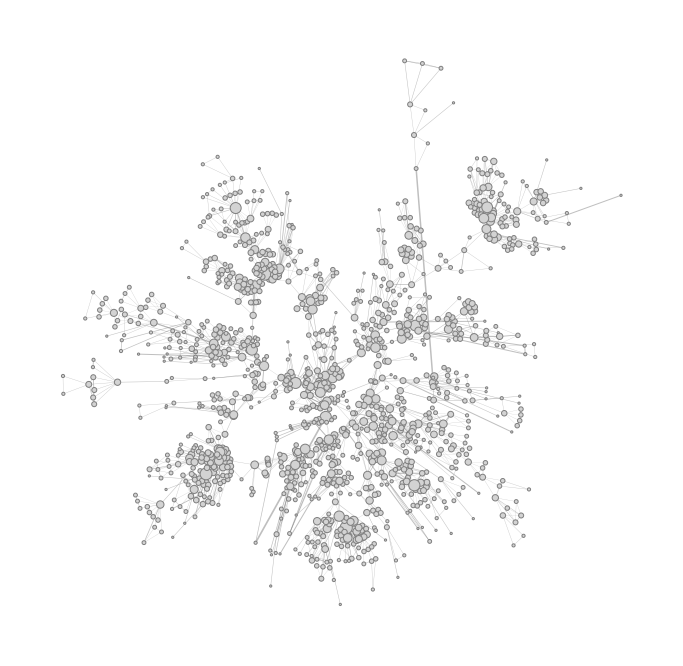

In [20]:
cs.draw_graph(
    G_lcc, 
    node_pos=vp_node_pos_kamada_kawai, 
    node_size_factor=5, 
    node_color=cs.uniform_vertex_property(G_lcc, 'lightgray'), 
    edge_width_factor=1, 
    edge_transparency=.5, 
    figsize='large'
)

---

## Exercise 4
Change node size from `degree` to `weight` (the number of publications an author has authored).

Hint: Read the description of the `draw_graph()` function in the compsoc.py file. What type of object does the `node_size` parameter need as input?
## Solution 4

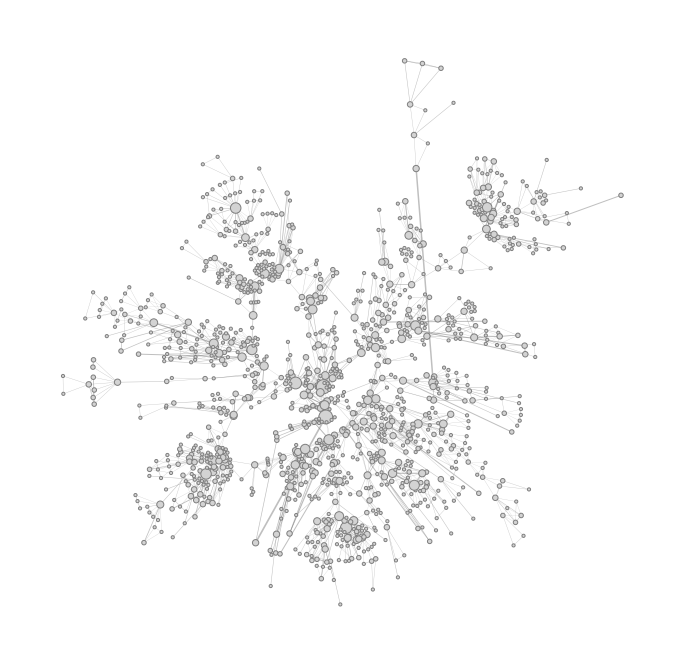

In [21]:
cs.draw_graph(
    G_lcc, 
    node_pos=vp_node_pos_kamada_kawai, 
    node_size=dict(authors_2010['weight']), 
    node_size_factor=10, 
    node_color=cs.uniform_vertex_property(G_lcc, 'lightgray'), 
    edge_width_factor=1, 
    edge_transparency=.5, 
    figsize='large'
)